In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = r'C:\Users\khush\Documents\dictionery\fifa_eda_stats.csv'
data = pd.read_csv(file_path)


In [11]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)


ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [7]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)


Number of duplicates: 0


In [8]:
# Filling missing values in categorical columns with the mode
categorical_columns = ['Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until']
data[categorical_columns] = data[categorical_columns].fillna(data.mode().iloc[0])


In [9]:
# Converting 'Joined' column to datetime format
data['Joined'] = pd.to_datetime(data['Joined'])


In [10]:
# Check if 'Height' column exists before modifying
if 'Height' in data.columns:
    # Convert 'Height' to centimeters
    data['Height_cm'] = data['Height'].apply(lambda x: int(x.split("'")[0]) * 30.48 + int(x.split("'")[1]) * 2.54 if isinstance(x, str) and "'" in x else x)

    # Drop the original 'Height' column
    data.drop(columns=['Height'], inplace=True)

    # Filling missing values in 'Height_cm'
    data['Height_cm'].fillna(data['Height_cm'].mean(), inplace=True)
else:
    print("'Height' column does not exist in the DataFrame.")





In [12]:
# Check if 'Height_cm' column exists before modifying
if 'Height_cm' in data.columns:
    # Display unique values in 'Height_cm'
    print(data['Height_cm'].unique())
else:
    print("'Height_cm' column does not exist in the DataFrame.")



[170.18       187.96       175.26       193.04       180.34
 172.72       182.88       167.64       177.8        198.12
 185.42       162.56       190.5        165.1        195.58
 200.66       160.02       157.48       203.2        154.94
 205.74       181.25758357]


In [17]:
numerical_columns = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [18]:
# Convert 'Jersey Number' to numeric
data['Jersey Number'] = pd.to_numeric(data['Jersey Number'], errors='coerce')

# Display unique values in numerical columns
for column in numerical_columns:
    try:
        unique_values = data[column].unique()
        print(f"Unique values in {column}:\n{unique_values}\n")
    except Exception as e:
        print(f"Error in {column}: {e}")

# Filling missing values in categorical columns with the mode
categorical_columns = ['International Reputation', 'Weak Foot', 'Skill Moves']
data[categorical_columns] = data[categorical_columns].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(data[categorical_columns].mode().iloc[0])

# Filling missing values in numerical columns with the mean
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce').fillna(data[numerical_columns].mean())


Unique values in Crossing:
[84.        79.        17.        93.        81.        86.
 77.        66.        13.        62.        88.        55.
 68.        82.        75.        15.        14.        70.
 58.        78.        52.        90.        64.        87.
 60.        12.        69.        46.        30.        80.
 11.        57.        83.        85.        20.        73.
 53.        72.        36.        44.        45.        40.
 27.        76.        63.        65.        48.        61.
 47.        89.        19.        49.         9.        71.
 74.        24.        18.        38.        92.        56.
 67.        35.        25.        50.        29.        10.
 42.        54.        59.        91.        51.        43.
 33.        34.        16.        39.        28.         8.
 21.        23.        41.        32.        37.        31.
 22.         7.        26.         6.         5.        49.7341814]

Unique values in Finishing:
[95.         94.         87.        

In [31]:
data['Jersey Number'].fillna(-1, inplace=True)




In [35]:
# Remove 'lbs' and convert to numeric
data['Weight'] = pd.to_numeric(data['Weight'].str.replace('lbs', ''), errors='coerce')

# Filling missing values in 'Weight' with the mean
data['Weight'].fillna(data['Weight'].mean(), inplace=True)


In [33]:
data['Release Clause'].fillna('Unknown', inplace=True)  # Replace with a meaningful default if needed


In [34]:
print(data['Weight'].unique())


['159lbs' '183lbs' '150lbs' '168lbs' '154lbs' '163lbs' '146lbs' '190lbs'
 '181lbs' '192lbs' '176lbs' '172lbs' '148lbs' '165lbs' '196lbs' '161lbs'
 '187lbs' '212lbs' '170lbs' '203lbs' '157lbs' '185lbs' '130lbs' '174lbs'
 '207lbs' '134lbs' '141lbs' '152lbs' '179lbs' '132lbs' '201lbs' '198lbs'
 '209lbs' '214lbs' '143lbs' '205lbs' '137lbs' '194lbs' '216lbs' '139lbs'
 '220lbs' '126lbs' '218lbs' '123lbs' '227lbs' '128lbs' '223lbs' '225lbs'
 '121lbs' '115lbs' '117lbs' '236lbs' '229lbs' '243lbs' nan '110lbs'
 '119lbs' '234lbs']


In [37]:
numerical_columns = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# Filling missing values in numerical columns with the mean
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())



In [38]:
missing_values_after = data.isnull().sum()
print(missing_values_after)


ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

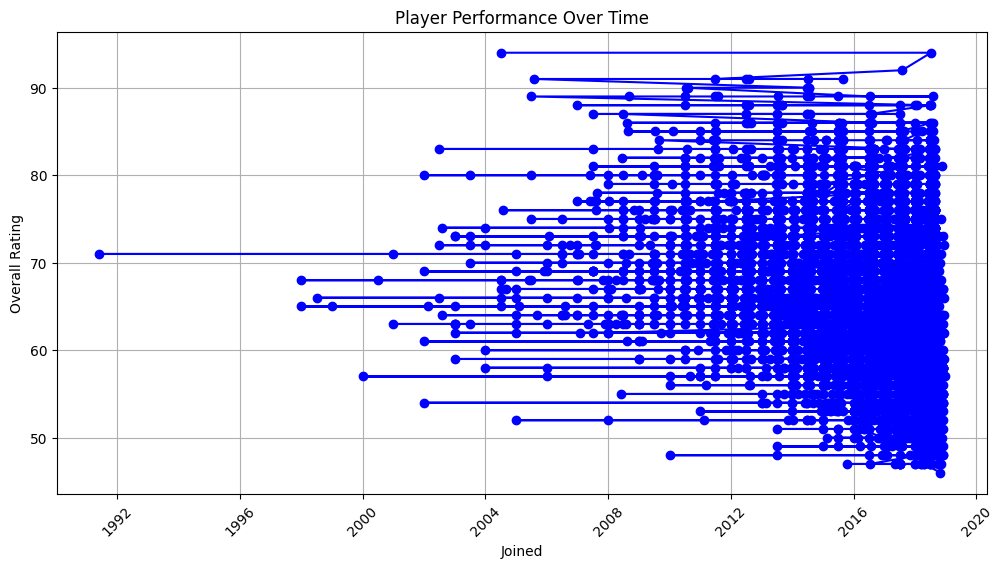

In [39]:
# Assuming you have a column 'Overall' and 'Joined' in your DataFrame
plt.figure(figsize=(12, 6))
plt.plot(data['Joined'], data['Overall'], marker='o', linestyle='-', color='b')
plt.title('Player Performance Over Time')
plt.xlabel('Joined')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

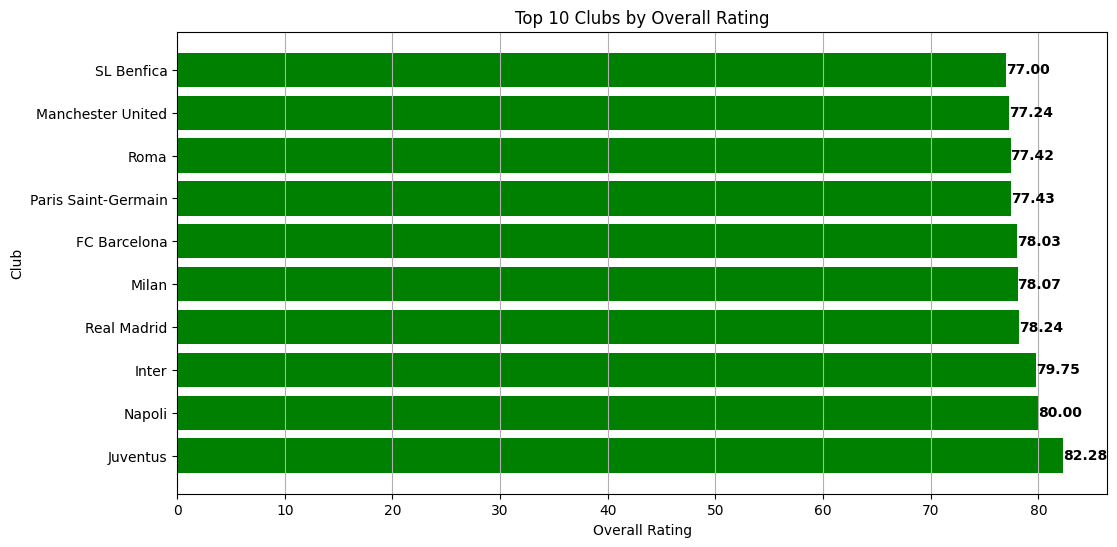

In [42]:


# Bar graph for the top 10 clubs by overall rating
plt.figure(figsize=(12, 6))
team_rankings = data.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
plt.barh(team_rankings.index, team_rankings.values, color='green')
plt.title('Top 10 Clubs by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Club')
plt.grid(axis='x')

# Adding labels to the bars
for index, value in enumerate(team_rankings.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontweight='bold')

plt.show()

